# COSC 311: Introduction to Data Visualization and Interpretation

Instructor: Dr. Shuangquan (Peter) Wang

Email: spwang@salisbury.edu

Department of Computer Science, Salisbury University


# Module 2_Data Processing and Organization

## 1. File processing



**Contents of this note refer to 1) the teaching materials at Department of Computer Science, William & Mary; 2) the textbook "Python crash course - a hands-on project-based introduction to programming"; 3) Python toturial: https://docs.python.org/3/tutorial/**

**<font color=red>All rights reserved. Dissemination or sale of any part of this note is NOT permitted.</font>**

# File

What is a file?

File is a collection of data. It is static and stored somewhere in your computer or cloud.

## How to open a file

Syntax:

**file_object = open(file_name,mode to open the file)**

Open file and return a corresponding file object.

Mode to open the file: (refer to https://stackabuse.com/file-handling-in-python/)
- r: Opens a file for **reading only** (*by default*)
- r+: Opens a file for **both reading and writing**
- w: Opens a file for **writing only**
- w+: Open a file for **writing and reading**
- a: Opens a file for **appending**
- a+: Opens a file for both **appending and reading**

Python looks for the file in the directory where the program that's currently being executed is stored (i.e. the data file and the program file are in the same folder).

If the data file and the program file are NOT in the same folder, the file path is needed. An example for Windows system: file_name = 'C:\python_files\filename.txt'

## How to read the entire file

Syntax:

**file_object.read()**

Read the entire contents of the file and store it as a long string

## How to read a line from the file

Syntax:

**file_object.readline()**

## How to close a file

Syntax:

**file_object.close()**

You should call **file_object.close()** to close the file and immediately free up any system resources used by it. 

If you don’t explicitly close a file, Python’s garbage collector will eventually destroy the object and close the open file for you, but the file may stay open for a while.

You can't guarantee that the changes will be saved to the file until it is closed. Thus, it is bad to rely on garbage collector to close your file for you.

In [1]:
# example: read the entire file
my_file = open('scores_1.txt','r')
content = my_file.read()
print(content)
my_file.close()

85
93
28
99
100
98
80
79
59
91



In [2]:
# example: read a line
my_file = open('scores_1.txt','r')
my_file.readline()

'85\n'

In [3]:
# pay attention to the output format
print(my_file.readline())

93



In [4]:
my_file.readline()

'28\n'

In [5]:
my_file.readline()

'99\n'

In [6]:
my_file.readline()

'100\n'

In [7]:
my_file.readline()

'98\n'

In [8]:
my_file.readline()

'80\n'

In [9]:
my_file.readline()

'79\n'

In [10]:
my_file.readline()

'59\n'

In [11]:
my_file.readline()

'91\n'

In [12]:
my_file.readline()

''

In [13]:
my_file.close()

**Example:**

Calculating the mean value of numbers in above file.

In [14]:
# Calculating the mean value of numbers in file scores_1.txt
my_file = open('scores_1.txt','r')
all_scores = 0
counter = 0

new_score = my_file.readline()
while new_score != '':
    all_scores += int(new_score)
    counter += 1
    new_score = my_file.readline()
print(all_scores/counter)
my_file.close()

81.2


**How about if there are some empty lines in the file? For example: file scores_2.txt**

In [3]:
# Calculating the mean value of numbers in file scores_2.txt
my_file = open('scores_2.txt','r')
all_scores = 0
counter = 0

new_score = my_file.readline()
while new_score != '':
    if new_score != '\n':
        all_scores += int(new_score)
        counter += 1
    new_score = my_file.readline()
print(all_scores/counter)
my_file.close()

81.2


**How about if there are multiple items in one line (e.g: name & score)? For example: scores_3.txt**

- **split(separator)** method returns a list of strings after breaking the given string by the specified separator (https://www.geeksforgeeks.org/python-string-split/)

- If separator is not specified or is None, consecutive whitespace are regarded as a single separator (https://docs.python.org/2/library/stdtypes.html#str.split)

- Whitespace include spaces, newlines '\n' and tabs '\t', and consecutive whitespace are processed together (https://note.nkmk.me/en/python-split-rsplit-splitlines-re/)

In [16]:
# Example
a = 'Linda 85\n'
a.split()

['Linda', '85']

In [1]:
# Calculating the mean value of numbers in file scores_3.txt
my_file = open('scores_3.txt','r')
all_scores = 0
counter = 0

new_score = my_file.readline()
while new_score != '':
    name_score_list = new_score.split()
    all_scores += int(name_score_list[1])
    counter += 1
    new_score = my_file.readline()
print(all_scores/counter)
my_file.close()

81.0


#  

## Write to a file

Syntax:

**file_object.write(content)**

Write content to the file. 

Pay attention: 

- You need to open the file using an appropriate mode (r+, w, w+, a, a+) before writing

- Python can only write strings to a text file. If you want to store numerical data in a text file, you have to convert the data to string using str() method.

**Example:**

Write 1,000 random numbers between 0 and 100 to a file named numbers.txt. Each number is in a line.

In [2]:
from random import randint

new_file = open('numbers.txt','w')
for i in range(1000):
    number = randint(0,100)
    new_file.write(str(number) + '\n')
new_file.close()

### Another way to open a file

Syntax:

**with open(file_name,mode to open the file) as file_object:**

It is good practice to use the **with** keyword when dealing with file objects. The advantage is that the file is properly closed after its suite finishes (No need to close the file using *file_object.close()*), even if an exception is raised at some point.

In [4]:
# use with keyword in above example
from random import randint

with open('numbers_2.txt','w') as new_file:
    for i in range(1000):
        number = randint(0,100)
        new_file.write(str(number) + '\n')


### Use print to write to a file

Syntax: 

**print(content,file = file_object)**

No need to convert the content to string. 

In [5]:
# use print to write to a file in above example
from random import randint

with open('numbers_3.txt','w') as new_file:
    for i in range(1000):
        number = randint(0,100)
        print(number,file = new_file)

## Exceptions for file

In [6]:
# when the file is not existed
f = open('goaway.txt','r')

FileNotFoundError: [Errno 2] No such file or directory: 'goaway.txt'

In [7]:
# Use try & except method
try:
    f = open('goaway.txt','r')
except:
    print('file open error')

file open error


In [8]:
# more specifically, we specify the error type
try:
    f = open('goaway.txt','r')
except FileNotFoundError:
    print('file does not exist.')

file does not exist.


In [9]:
# multiple exceptions
try:
    #f = open('goaway.txt','r')
    my_list = [1,2,3,4]
    print(my_list[5])
except FileNotFoundError:
    print('file does not exist.')
except IndexError:
    print('Index out of range of your list')

Index out of range of your list


#   

## Application example

Open and read the file named 'Bovary_Excerpt.txt', create a dictionary that uses each word in this file as a key and the appearance frequency of this word as the value. 

In [10]:
word_counts = {}
with open('Bovary_Excerpt.txt','r') as file: # \ lets you continue writing onto nextline
    for line in file:
        tokens = line.upper().replace(',','').replace(';','').replace('(','').replace(')','')\
        .replace('!','').replace('?','').replace('.','').split()
        for word in tokens:
            try:
                word_counts[word] += 1
            except:
                word_counts[word] = 1

In [11]:
print(word_counts['AVEC'])

11


In [12]:
print(word_counts['ELLE'])

20


Based on the above dictionary, how about if we reverse the key and value in the dictionary? That is, we use the appearence frequency as the key and use the words as the value.

In [28]:
word_lists = {}
for word,count in word_counts.items():
    try:
        word_lists[count].append(word)
    except:
        word_lists[count] = [word]
print(word_lists[1])

['FEMME', 'ÉTÉ', 'FOLLE', 'AUTREFOIS', "L'AVAIT", 'AIMÉ', 'SERVILITÉS', "L'AVAIENT", 'DÉTACHÉ', "D'ELLE", 'DAVANTAGE', 'ENJOUÉE', 'JADIS', 'EXPANSIVE', 'AIMANTE', 'VIEILLISSANT', 'DEVENUE', 'FAÇON', 'VIN', 'ÉVENTÉ', 'VINAIGRE', "D'HUMEUR", 'DIFFICILE', 'PIAILLARDE', 'NERVEUSE', 'TANT', 'SOUFFERT', 'PLAINDRE', "D'ABORD", 'GOTONS', 'VINGT', 'MAUVAIS', 'LIEUX', 'RENVOYAIENT', 'BLASÉ', 'PUANT', "L'IVRESSE", "L'ORGUEIL", 'RÉVOLTÉ', 'TUE', 'AVALANT', 'RAGE', 'STOÏCISME', 'MUET', 'GARDA', 'MORT', 'CESSE', 'COURSES', 'AFFAIRES', 'AVOUÉS', 'PRÉSIDENT', 'RAPPELAIT', "L'ÉCHÉANCE", 'BILLETS', 'OBTENAIT', 'RETARDS', 'COUSAIT', 'BLANCHISSAIT', 'SURVEILLAIT', 'SOLDAIT', 'MÉMOIRES', 'TANDIS', "S'INQUIÉTER", 'CONTINUELLEMENT', 'ENGOURDI', 'SOMNOLENCE', 'BOUDEUSE', 'RÉVEILLAIT', 'DIRE', 'DÉSOBLIGEANTES', 'RESTAIT', 'FUMER', 'COIN', 'CRACHANT', 'CENDRES', 'EUT', 'FALLUT', 'METTRE', 'NOURRICE', 'EUX', 'MARMOT', 'GÂTÉ', 'PRINCE', 'NOURRISSAIT', 'CONFITURES', 'LAISSAIT', 'SOULIERS', 'PHILOSOPHE', 'ALLER', '

In [14]:
appearances = list(word_lists.keys()) 
#for value in word_lists.values():
#    print(len(value))
num_words = [len(value) for value in word_lists.values()]
avg_len = [sum([len(word) for word in value]) / len(value) for value in word_lists.values()] # avg. word length for each key 

In [15]:
print(appearances)
print(num_words)
print(avg_len)

[24, 1, 8, 77, 28, 20, 11, 2, 17, 3, 38, 6, 7, 21, 43, 39, 50, 4, 33, 5, 25, 26, 15, 44, 13, 12]
[1, 624, 8, 1, 1, 2, 2, 80, 1, 26, 1, 7, 3, 2, 1, 1, 1, 7, 1, 4, 1, 1, 1, 1, 3, 1]
[2.0, 7.238782051282051, 3.625, 2.0, 3.0, 4.0, 3.0, 5.925, 3.0, 5.230769230769231, 2.0, 4.285714285714286, 4.666666666666667, 2.0, 1.0, 2.0, 2.0, 4.428571428571429, 3.0, 3.5, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0]


<BarContainer object of 26 artists>

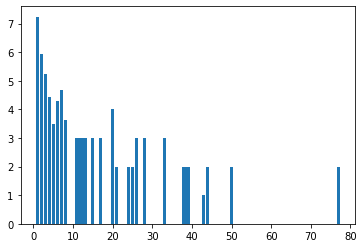

In [18]:
import matplotlib.pyplot as plt 
plt.bar(appearances, avg_len)

**matplotlib.pyplot**

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

matplotlib.pyplot is an interface to matplotlib, which is a comprehensive library for creating static, animated, and interactive visualizations in Python. It provides a MATLAB-like way of plotting.

matplotlib.pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation.


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]
[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.99749499  0.9995736   0.99166481
  0.97384763  0.94630009  0.90929743  0.86320937  0.8084964   0.74570521
  0.67546318  0.59847214  0.51550137  0.42737988  0.33498815  0.23924933
  0.14112001  0.04158066 -0.05837414 -0.15774569 -0.2555411  -0.35078323
 -0.44252044 -0.52983614 -0.61185789 -0.68776616 -0.7568025  -0.81827711
 -0.87157577 -0.91616594 -0.95160207 -0.97753012 -0.993691   -0.99992326
 -0.99616461 -0.98245261]


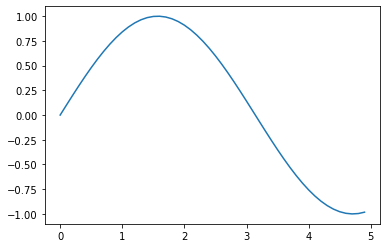

In [27]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 5, 0.1)
print(x)
y = np.sin(x)
print(y)
plt.plot(x, y)